# Install Dependencies

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime

# Data Pre Processing

In [10]:
bank = pd.read_csv(r"C:\Users\Rohit\Desktop\Data Science Projects\Data sets\bank.csv", sep=";")

In [11]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [12]:
bank.shape

(41188, 21)

In [13]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Finding Missing Values 

In [16]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
categorical_val = []
continous_val = []
for column in bank.columns:
    print('==============================')
    print(f"{column} : {bank[column].unique()}")
    if len(bank[column].unique()) <= 100:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

### Label Encoding

In [19]:
dummies = pd.get_dummies(bank['job'],drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [22]:
dummies = pd.get_dummies(bank['marital'],prefix = 'marital', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [24]:
dummies = pd.get_dummies(bank['education'],prefix = 'education', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [25]:
dummies = pd.get_dummies(bank['default'],prefix = 'default', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [26]:
dummies = pd.get_dummies(bank['housing'],prefix = 'housing', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [27]:
dummies = pd.get_dummies(bank['loan'],prefix = 'loan', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [28]:
dummies = pd.get_dummies(bank['contact'],prefix = 'contact', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [29]:
dummies = pd.get_dummies(bank['poutcome'],prefix = 'poutcome', drop_first=True)
bank = pd.concat([bank,dummies],axis = 1)

In [38]:
bank["month"].replace({"may": "5", "mar": "3","apr": "4","jun": "6","jul": "7","aug": "8","sep": "9","oct": "10","nov": "11","dec": "12"}, inplace=True)

In [40]:
bank["day_of_week"].replace({"mon": "1", "tue": "2","wed": "3","thu": "4","fri": "5"}, inplace=True)

In [42]:
bank.drop(['job','marital','education','default','housing','loan','contact','poutcome'], axis=1, inplace=True)

In [46]:
bank['y'].replace({"no": "0", "yes": "1"}, inplace=True)

In [47]:
bank.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,0,1,1,0
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,0,1,1,0
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,1,1,0
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,0,1,1,0
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,1,1,0


In [48]:
bank.columns

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [49]:
#Checking zeros in Columns
feature_columns = ['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success']
for column in feature_columns:
    print("=================================================")
    print(f"{column} ==> Missing zeros : {len(bank.loc[bank[column] == 0])}")

age ==> Missing zeros : 0
month ==> Missing zeros : 0
day_of_week ==> Missing zeros : 0
duration ==> Missing zeros : 4
campaign ==> Missing zeros : 0
pdays ==> Missing zeros : 15
previous ==> Missing zeros : 35563
emp.var.rate ==> Missing zeros : 0
cons.price.idx ==> Missing zeros : 0
cons.conf.idx ==> Missing zeros : 0
euribor3m ==> Missing zeros : 0
nr.employed ==> Missing zeros : 0
blue-collar ==> Missing zeros : 31934
entrepreneur ==> Missing zeros : 39732
housemaid ==> Missing zeros : 40128
management ==> Missing zeros : 38264
retired ==> Missing zeros : 39468
self-employed ==> Missing zeros : 39767
services ==> Missing zeros : 37219
student ==> Missing zeros : 40313
technician ==> Missing zeros : 34445
unemployed ==> Missing zeros : 40174
unknown ==> Missing zeros : 40858
marital_married ==> Missing zeros : 16260
marital_single ==> Missing zeros : 29620
marital_unknown ==> Missing zeros : 41108
education_basic.6y ==> Missing zeros : 38896
education_basic.9y ==> Missing zeros : 35

# Visualization

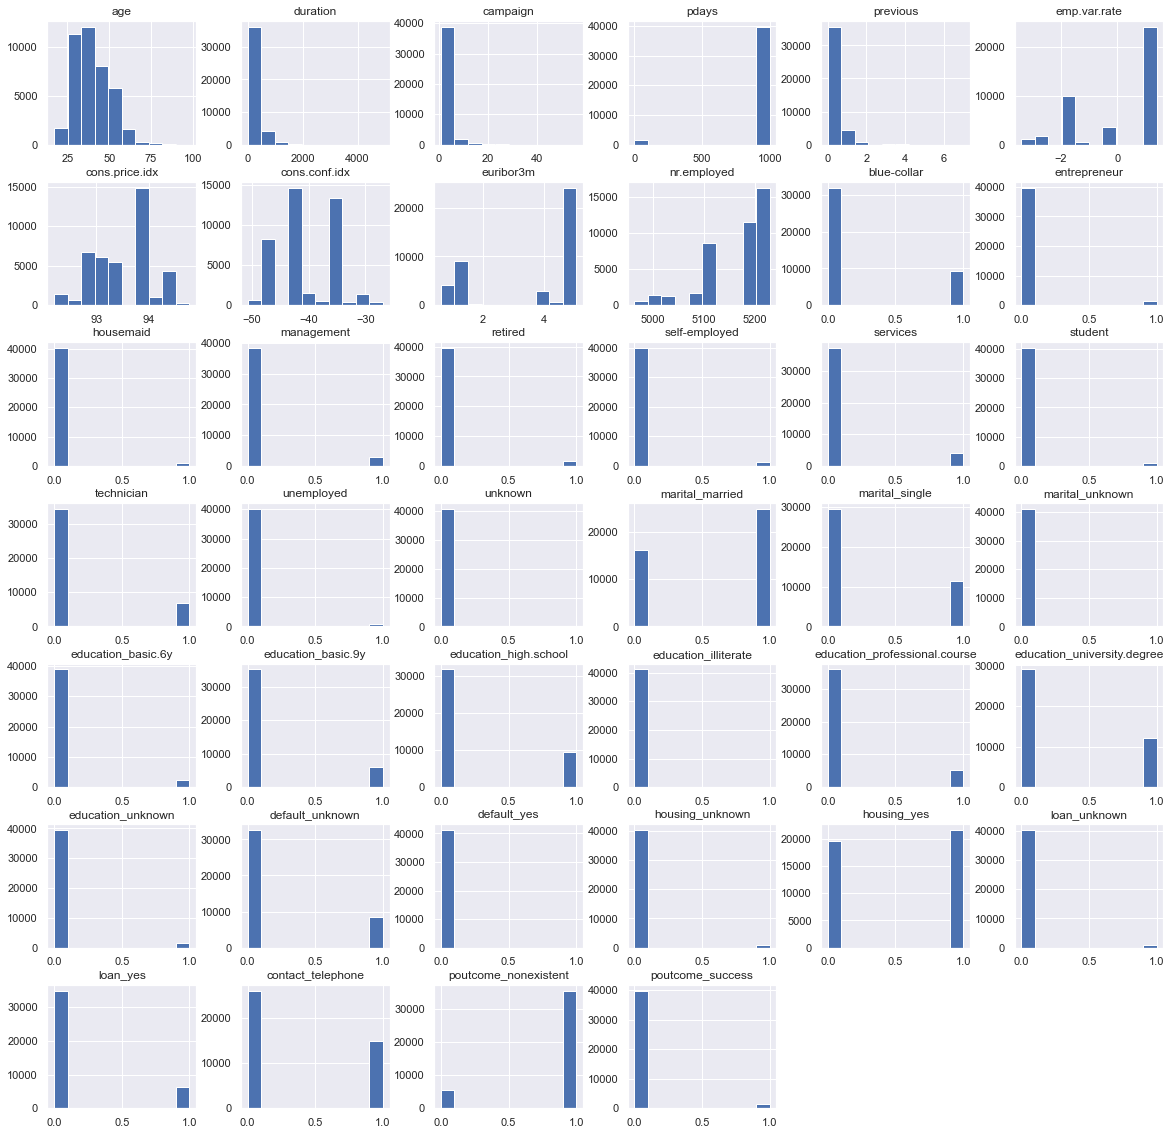

In [183]:
bank.hist(figsize = (20,20))
plt.show()

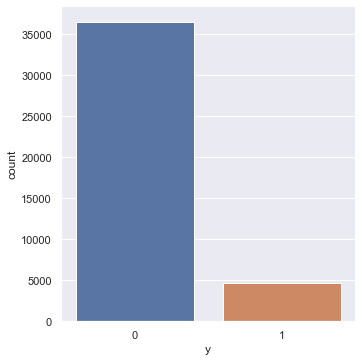

In [185]:
#Counts of 'y' feature
sns.catplot('y', data=bank, kind='count')
plt.show()

<Figure size 2160x2160 with 0 Axes>

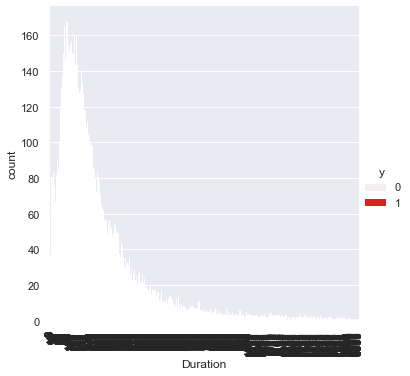

In [201]:
plt.figure(figsize=(30,30))
sns.catplot('duration', hue='y',color='red', data=bank, kind='count')
plt.xlabel('Duration')
plt.xticks(rotation=90)
plt.show()

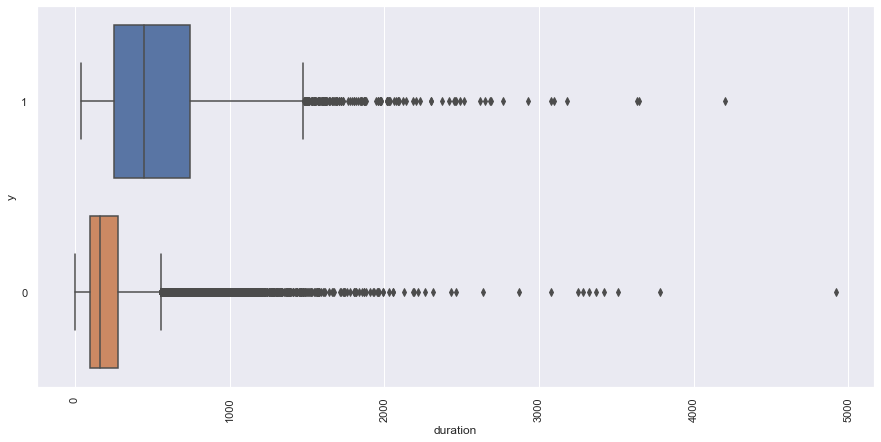

In [211]:
plt.figure(figsize=(15,7))
plt.xticks(Rotation=90)
sns.boxplot(y="y",x="duration",data=bank.sort_values("y",ascending=False))
plt.show()

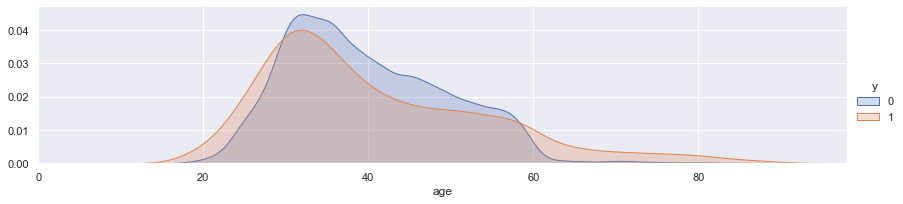

In [187]:
fig = sns.FacetGrid(bank, hue="y", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = bank['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

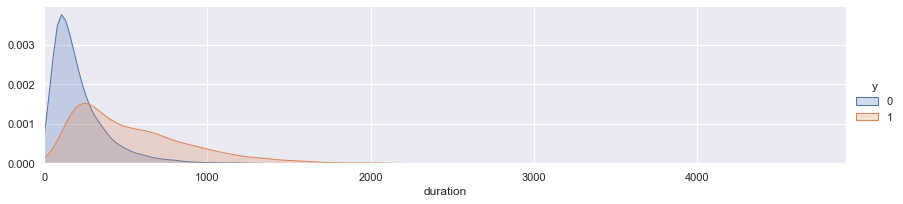

In [189]:
fig = sns.FacetGrid(bank, hue="y", aspect=4)
fig.map(sns.kdeplot, 'duration', shade=True)
time = bank['duration'].max()
fig.set(xlim=(0, time))
fig.add_legend()

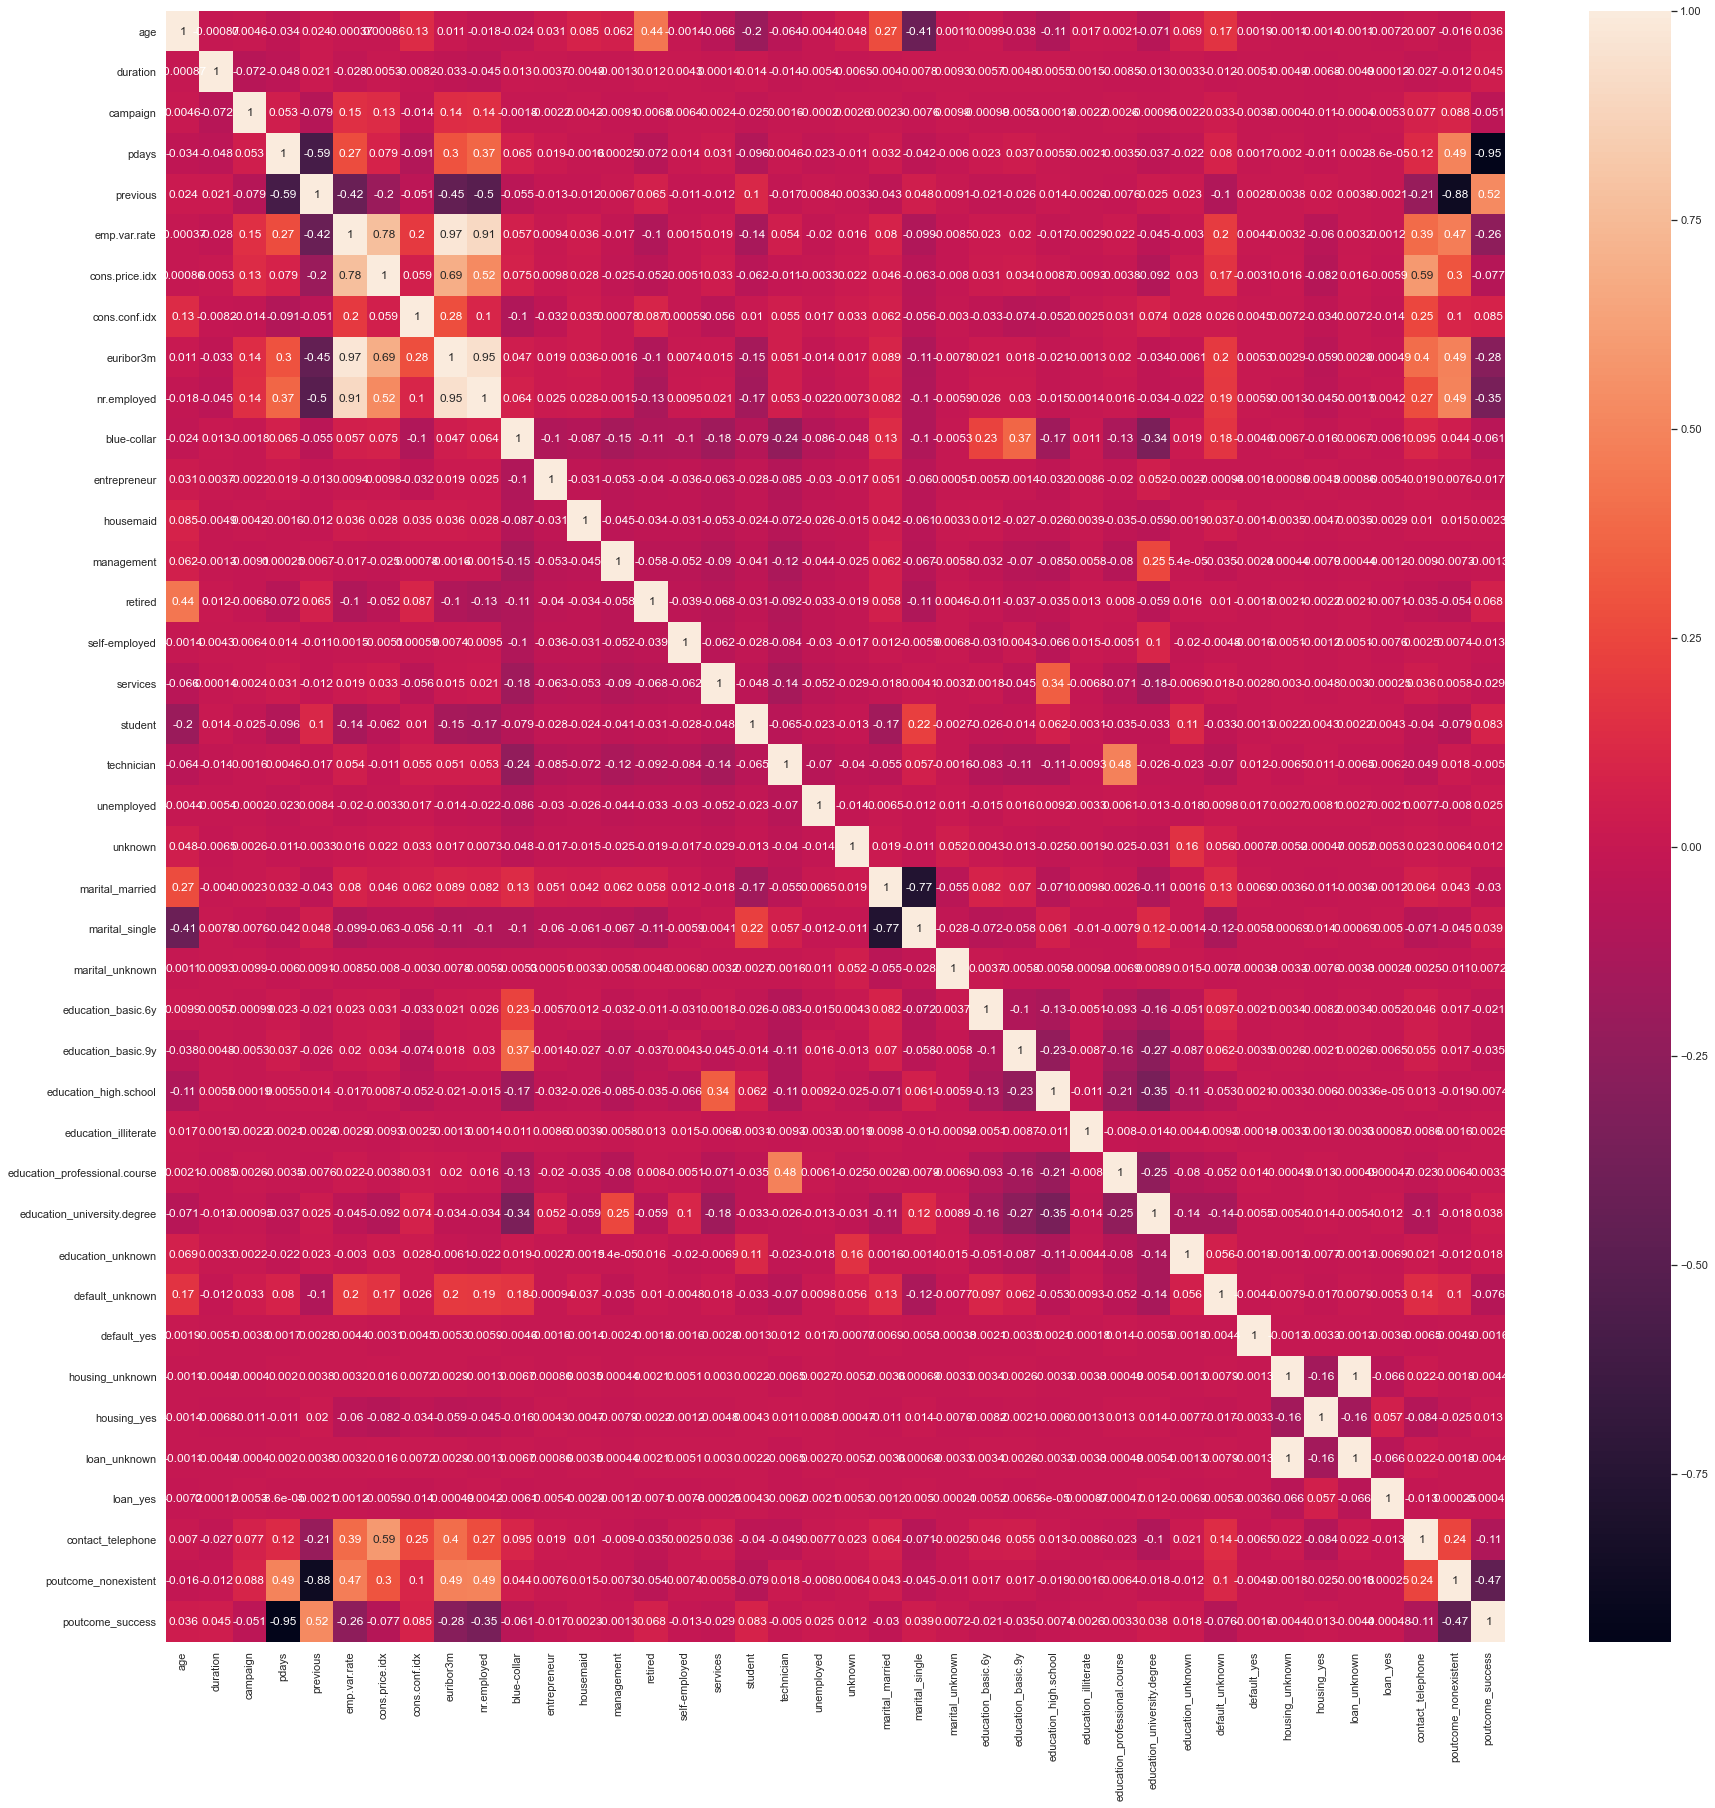

In [192]:
plt.figure(figsize=(30,30))
sns.heatmap(bank.corr(),annot=True)
plt.show()

# Selection of Important Features

In [193]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [194]:
print(selection.feature_importances_)

[0.05631555 0.01566003 0.0437979  0.26957975 0.04439987 0.07092372
 0.01040736 0.01813519 0.01446263 0.02443559 0.08188602 0.07374682
 0.01186653 0.0057636  0.00453268 0.01124105 0.00922632 0.0064438
 0.00975467 0.00672187 0.0153132  0.00604082 0.00263803 0.01698767
 0.01600873 0.00068522 0.00649724 0.01103948 0.01433846 0.00047925
 0.01158628 0.01592488 0.00721639 0.01215157 0.         0.00233625
 0.02570992 0.00246618 0.01752777 0.01071162 0.00754359 0.00749651]


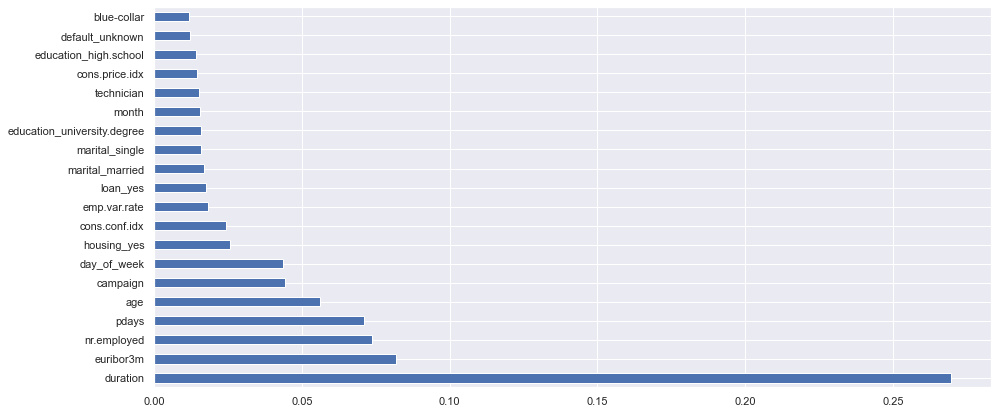

In [195]:
plt.figure(figsize=(15,7))
f_importances = pd.Series(selection.feature_importances_,index=X.columns)
f_importances.nlargest(20).plot(kind='barh')
plt.show()

**So from above graph we can conclude that important feature in the data set is 'duration' so on the basis of this particular feature we need to make the predictions whether the client will subscribe or not.**

# Defining X and y 

In [50]:
X = bank.drop('y',axis=1)
y = bank.y

In [55]:
X.shape

(41188, 42)

In [56]:
X.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,0,1,1,0
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,0,1,1,0
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,1,1,0
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,0,1,1,0
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,1,1,0


In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: object

# Splitting data into Train & Test 

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
X_train.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
39075,29,12,1,77,3,999,1,-3.0,92.713,-33.0,...,0,0,0,0,0,0,0,0,0,0
34855,29,5,5,12,4,999,0,-1.8,92.893,-46.2,...,0,0,0,0,0,0,0,1,1,0
7107,45,5,4,277,2,999,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,0,1,1,0
31614,34,5,4,70,1,999,1,-1.8,92.893,-46.2,...,0,0,0,0,0,0,0,0,0,0
34878,32,5,5,1181,9,999,0,-1.8,92.893,-46.2,...,0,0,0,0,0,0,0,0,1,0


In [61]:
X_test.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
32884,57,5,1,371,1,999,1,-1.8,92.893,-46.2,...,0,0,0,0,0,0,1,0,0,0
3169,55,5,4,285,2,999,0,1.1,93.994,-36.4,...,1,1,0,0,1,0,0,1,1,0
32206,33,5,5,52,1,999,1,-1.8,92.893,-46.2,...,0,0,0,0,0,0,0,0,0,0
9403,36,6,5,355,4,999,0,1.4,94.465,-41.8,...,0,0,0,0,0,0,0,1,1,0
14020,27,7,5,189,2,999,0,1.4,93.918,-42.7,...,0,0,0,0,1,0,0,0,1,0


In [62]:
X_train.shape, X_test.shape

((28831, 42), (12357, 42))

# Data Standardization

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Random Forest Model Building

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini',random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [77]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
yrf_pred = rf_clf.predict(X_test)

print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,yrf_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,yrf_pred),"\n")
print(classification_report(y_test, yrf_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10613   355]
 [  697   692]]

Accuracy Score:
 0.9148660678158129 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [79]:
yrf_train_pred = rf_clf.predict(X_train)
yrf_test_pred = rf_clf.predict(X_test)

In [80]:
print("TRAINIG RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_train,yrf_train_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_train,yrf_train_pred),"\n")
print(classification_report(y_train, yrf_train_pred))

TRAINIG RESULTS: 
Confusion Matrix:
 [[25580     0]
 [    0  3251]]

Accuracy Score:
 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25580
           1       1.00      1.00      1.00      3251

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831



In [81]:
print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,yrf_test_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,yrf_test_pred),"\n")
print(classification_report(y_test, yrf_test_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10613   355]
 [  697   692]]

Accuracy Score:
 0.9148660678158129 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



Text(0.5, 12.5, 'Predicted label')

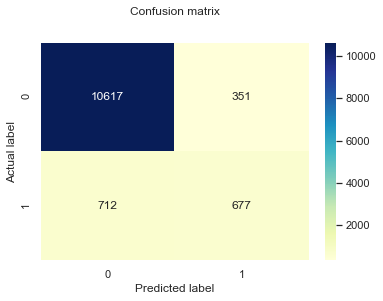

In [212]:
y_pred = rf_clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Hyper Parameter Optimization

**My Hyper Parameter Optimization was taking lot of time to execute so i stopped it in half way as there were more than 2000 processings of feature so could not be able to complete it because of the time restrictions**

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000]
             }

In [89]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [91]:
#grid_search.fit(X_train,y_train)

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_score = grid_search.best_score_

In [ ]:
best_param = grid_search.best_params_

# AdaBoost

In [214]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree_stump = DecisionTreeClassifier(max_depth=1)
ada_boost_clf = AdaBoostClassifier(base_estimator=tree_stump,n_estimators=30)
ada_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=30)

In [94]:
yad_train_pred = ada_boost_clf.predict(X_train)
yad_test_pred = ada_boost_clf.predict(X_test)

In [95]:
print("TRAINIG RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_train,yad_train_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_train,yad_train_pred),"\n")
print(classification_report(y_train, yad_train_pred))

TRAINIG RESULTS: 
Confusion Matrix:
 [[24909   671]
 [ 1956  1295]]

Accuracy Score:
 0.9088827997641428 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25580
           1       0.66      0.40      0.50      3251

    accuracy                           0.91     28831
   macro avg       0.79      0.69      0.72     28831
weighted avg       0.90      0.91      0.90     28831



In [96]:
print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,yad_test_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,yad_test_pred),"\n")
print(classification_report(y_test, yad_test_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10664   304]
 [  843   546]]

Accuracy Score:
 0.9071781176661002 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.64      0.39      0.49      1389

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



Text(0.5, 12.5, 'Predicted label')

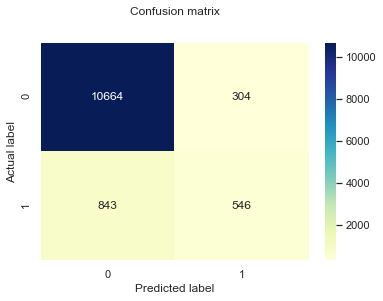

In [215]:
y_pred = ada_boost_clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SVM

In [97]:
from sklearn.svm import SVC
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [98]:
ysvm_train_pred = model_linear.predict(X_train)
ysvm_test_pred = model_linear.predict(X_test)

In [99]:
print("TRAINIG RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_train,ysvm_train_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_train,ysvm_train_pred),"\n")
print(classification_report(y_train, ysvm_train_pred))

TRAINIG RESULTS: 
Confusion Matrix:
 [[24059  1521]
 [ 1468  1783]]

Accuracy Score:
 0.8963268703825743 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     25580
           1       0.54      0.55      0.54      3251

    accuracy                           0.90     28831
   macro avg       0.74      0.74      0.74     28831
weighted avg       0.90      0.90      0.90     28831



In [100]:
print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,ysvm_test_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,ysvm_test_pred),"\n")
print(classification_report(y_test, ysvm_test_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10304   664]
 [  587   802]]

Accuracy Score:
 0.898761835396941 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10968
           1       0.55      0.58      0.56      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.76      0.75     12357
weighted avg       0.90      0.90      0.90     12357



Text(0.5, 12.5, 'Predicted label')

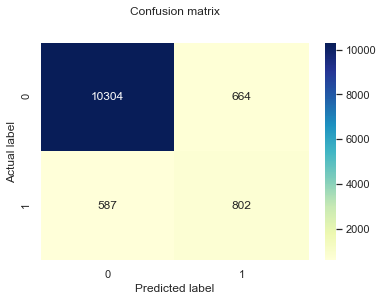

In [217]:
y_pred = model_linear.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNN

In [219]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [104]:
#Checking Maximum Train Score to finalize the K-value
max_train_score = max(train_scores)
train_scores_ = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_))))

Max train score 100.0 % and k = [1]


In [105]:
#Checking Maximum Test Score to finalize the K-value
max_test_score = max(test_scores)
test_scores_ = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_))))

Max test score 91.29238488306223 % and k = [14]


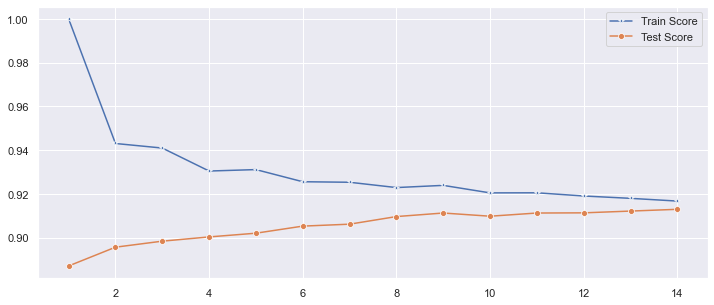

In [107]:
sns.set()
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

**As we can see in the graph the value after 2 is consitently increasing for Test Score and descreasing for Train Score so 2 is the perfect value for 'K'**

In [127]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8956057295460063

In [128]:
y_pred = knn.predict(X_test)
yk_train_pred = knn.predict(X_train)
yk_test_pred = knn.predict(X_test)

In [129]:
print("TRAINIG RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_train,yk_train_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_train,yk_train_pred),"\n")
print(classification_report(y_train, yk_train_pred))

TRAINIG RESULTS: 
Confusion Matrix:
 [[25580     0]
 [ 1643  1608]]

Accuracy Score:
 0.9430127293538205 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25580
           1       1.00      0.49      0.66      3251

    accuracy                           0.94     28831
   macro avg       0.97      0.75      0.82     28831
weighted avg       0.95      0.94      0.93     28831



In [130]:
print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,yk_test_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,yk_test_pred),"\n")
print(classification_report(y_test, yk_test_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10687   281]
 [ 1009   380]]

Accuracy Score:
 0.8956057295460063 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.57      0.27      0.37      1389

    accuracy                           0.90     12357
   macro avg       0.74      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



Text(0.5, 12.5, 'Predicted label')

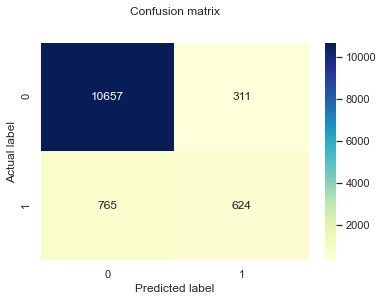

In [220]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Logistic Regression

In [222]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
ylr_pred = lr.predict(X_test)

In [132]:
ylr_train_pred = lr.predict(X_train)
ylr_test_pred = lr.predict(X_test)

In [133]:
print("TRAINIG RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_train,ylr_train_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_train,ylr_train_pred),"\n")
print(classification_report(y_train, ylr_train_pred))

TRAINIG RESULTS: 
Confusion Matrix:
 [[24899   681]
 [ 1982  1269]]

Accuracy Score:
 0.9076341438035448 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25580
           1       0.65      0.39      0.49      3251

    accuracy                           0.91     28831
   macro avg       0.79      0.68      0.72     28831
weighted avg       0.90      0.91      0.90     28831



In [178]:
print("TESTING RESULTS: \n===============================")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,ylr_test_pred))
print("\nAccuracy Score:\n", metrics.accuracy_score(y_test,ylr_test_pred),"\n")
print(classification_report(y_test, ylr_test_pred))

TESTING RESULTS: 
Confusion Matrix:
 [[10684   284]
 [  813   576]]

Accuracy Score:
 0.9112244072185806 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Text(0.5, 12.5, 'Predicted label')

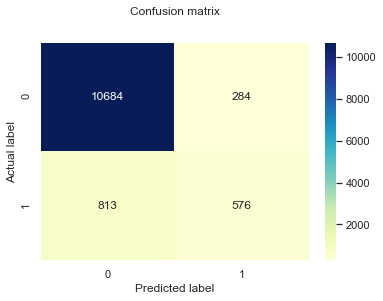

In [223]:
y_pred = lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Voting Classifier

In [153]:
scores = {'Random Forest Classfier': {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),},}

In [154]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),}

In [155]:
scores['KNN'] = {
        'Train': accuracy_score(y_train, knn.predict(X_train)),
        'Test': accuracy_score(y_test, knn.predict(X_test)),}

In [157]:
scores['SVM'] = {
        'Train': accuracy_score(y_train, model_linear.predict(X_train)),
        'Test': accuracy_score(y_test, model_linear.predict(X_test)),}

In [158]:
scores['Logistic Regression'] = {
        'Train': accuracy_score(y_train, lr.predict(X_train)),
        'Test': accuracy_score(y_test, lr.predict(X_test)),}

In [172]:
from sklearn.ensemble import VotingClassifier

estimators = []
lr = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', lr))

rf_clf = RandomForestClassifier()
estimators.append(('Tree', rf_clf))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

knn = KNeighborsClassifier()
estimators.append(('KNN', knn))

ada_boost_clf = AdaBoostClassifier(base_estimator=tree_stump)
estimators.append(('AdaBoost', ada_boost_clf))

In [173]:
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Tree', RandomForestClassifier()), ('SVM', SVC()),
                             ('KNN', KNeighborsClassifier()),
                             ('AdaBoost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))])

In [174]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),}

Text(0.5, 12.5, 'Predicted label')

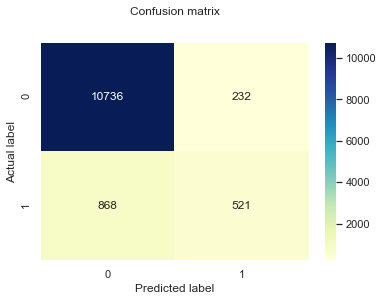

In [224]:
y_pred = voting.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<AxesSubplot:>

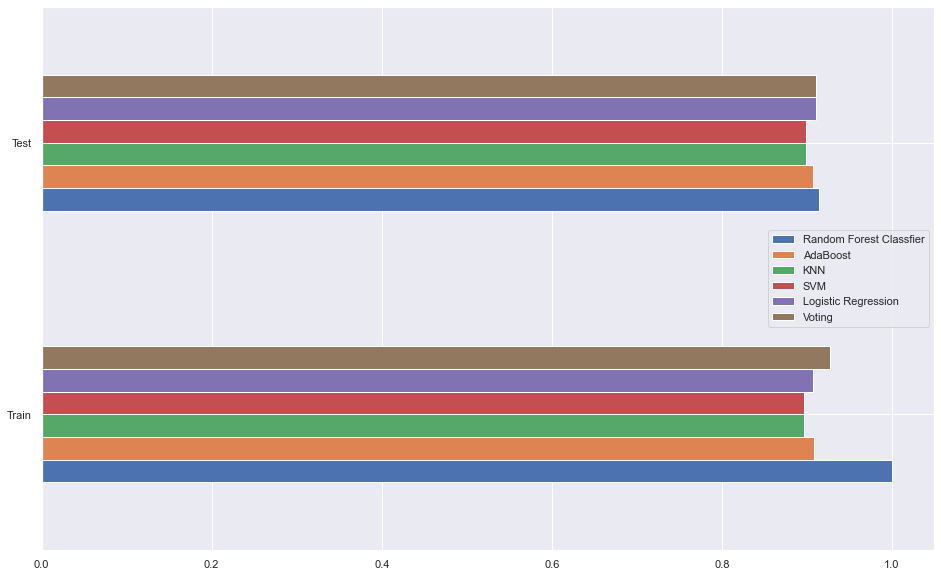

In [177]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(16, 10))

**From the above graph we can conclude that Random Forest is giving best Accuracy in Test Data (0.91486) as well as in Train Data (1.00) so Random Forest Classifier is best model for this particular data set as its predicton accuracy is much better than other models. Random Forest performs better in predicting if the client will subscribe to term deposit ot not.**

# Results and Conclusions

1. The Random Forest model accuracy score is 0.9148. So, the model does a very good job in predicting whether the client will subscribe to term deposit or not.

2. I have used 1000 Decissin trees in the random forest to make it more flexible to find to good fit and increase the accuracy of the model. Which is giving better accuracy all other models.

3. The second best model is Logistic Regression as it gives the accuracy 0.9112.

4. Rest of the model are too good whereas AdaBoost gives accuracy score 0.9071, SVM gives accuracy score 0.8987 and KNN gives the accuracy score 0.8956

5. The accuracy of the model can be increased by doing Hyper Parameter Optimization using GridSearchCV and the model can be made more better to make predictions.

6. Overall model could be improved with more data.

7. I have used the Random Forest model and other models to find only the important features, build the model using important features and see it gives good accuracy. The most important feature is duration.

8. We can train the model more better by removing the least important features so the model can give the best accuracy score.

9. I have used Confusion matrix and classification report to visualize the model performance. They show good performance of the model.

10. The model is showing good accuracy even without Hyper Parameter Optimization. With Hyper Parameter Optimization it can be even made better and perfect.